In [25]:
import numpy as np
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
client = MongoClient('mongodb://localhost:27017/')
collection = db['output']
results = list(collection.find())

# Dummy data based on the output of analyze_sentiment
# results = [
#     {
#         'text': "The flight was delayed for 5 hours!",
#         'lang': "en",
#         'sentiment': "negative",
#         'month': "September"
#     },
#     {
#         'text': "Loved the inflight entertainment system!",
#         'lang': "en",
#         'sentiment': "positive",
#         'month': "September"
#     },
#     {
#         'text': "The food was average, nothing special.",
#         'lang': "en",
#         'sentiment': "neutral",
#         'month': "September"
#     },
#     {
#         'text': "Missed my connecting flight due to delays.",
#         'lang': "en",
#         'sentiment': "negative",
#         'month': "September"
#     },
#     {
#         'text': "The crew was very friendly and helpful.",
#         'lang': "en",
#         'sentiment': "positive",
#         'month': "September"
#     },
#     {
#         'text': "Long wait at the baggage claim, frustrating.",
#         'lang': "en",
#         'sentiment': "negative",
#         'month': "September"
#     },
#     {
#         'text': "The flight was on time and smooth.",
#         'lang': "en",
#         'sentiment': "positive",
#         'month': "September"
#     },
#     {
#         'text': "Seats were uncomfortable for a long flight.",
#         'lang': "en",
#         'sentiment': "negative",
#         'month': "September"
#     },
#     {
#         'text': "I appreciate the quick check-in process.",
#         'lang': "en",
#         'sentiment': "positive",
#         'month': "September"
#     },
#     {
#         'text': "The Wi-Fi didn't work during the flight.",
#         'lang': "en",
#         'sentiment': "negative",
#         'month': "September"
#     },
#      {
#         'text': "Horrible experience with customer service.",
#         'lang': "en",
#         'sentiment': "negative",
#         'month': "October"
#     },
#     {
#         'text': "The flight arrived earlier than expected!",
#         'lang': "en",
#         'sentiment': "positive",
#         'month': "October"
#     },
#     {
#         'text': "Food options were limited but decent.",
#         'lang': "en",
#         'sentiment': "neutral",
#         'month': "October"
#     },
#     {
#         'text': "My luggage was lost, terrible experience!",
#         'lang': "en",
#         'sentiment': "negative",
#         'month': "October"
#     },
#     {
#         'text': "Excellent flight with great crew service.",
#         'lang': "en",
#         'sentiment': "positive",
#         'month': "October"
#     },
#     {
#         'text': "The boarding process was chaotic.",
#         'lang': "en",
#         'sentiment': "negative",
#         'month': "October"
#     },
#     {
#         'text': "Inflight announcements were clear and helpful.",
#         'lang': "en",
#         'sentiment': "positive",
#         'month': "October"
#     },
#     {
#         'text': "The cabin was too cold during the flight.",
#         'lang': "en",
#         'sentiment': "negative",
#         'month': "October"
#     },
#     {
#         'text': "Easy online booking process, very smooth!",
#         'lang': "en",
#         'sentiment': "positive",
#         'month': "October"
#     },
#     {
#         'text': "The flight staff handled turbulence well.",
#         'lang': "en",
#         'sentiment': "positive",
#         'month': "October"
#     },
#     {
#         'text': "The flight was delayed for hours!",
#         'lang': "en",
#         'sentiment': "negative",
#         'month': "November"
#     },
#     {
#         'text': "Excellent service and smooth flight!",
#         'lang': "en",
#         'sentiment': "positive",
#         'month': "November"
#     },
#     {
#         'text': "Food was okay, nothing special.",
#         'lang': "en",
#         'sentiment': "neutral",
#         'month': "November"
#     },
#     {
#         'text': "Terrible experience with baggage handling.",
#         'lang': "en",
#         'sentiment': "negative",
#         'month': "November"
#     },
#     {
#         'text': "Great customer service, thank you!",
#         'lang': "en",
#         'sentiment': "positive",
#         'month': "November"
#     },
# ]


## Preparing the sentiment data 

In [27]:
# Convert the results into a DataFrame
df = pd.DataFrame(results)

# Separate sentiment counts by month
sentiment_counts_by_date = df.groupby('date')['sentiment'].value_counts().unstack(fill_value=0)

# Calculate proportions
sentiment_proportions = sentiment_counts_by_date.div(sentiment_counts_by_date.sum(axis=1), axis=0)

# Display proportions
print("Sentiment Proportions by Date:")
print(sentiment_proportions)

Sentiment Proportions by Date:
sentiment   negative   neutral  positive
date                                    
24-11-2024  0.464286  0.464286  0.071429


In [28]:
sentiment_proportions = pd.DataFrame(sentiment_proportions, index=['24-11-2024', '23-11-2024', '22-11-2024'])

# Reset index to turn 'month' into a column
sentiment_proportions = sentiment_proportions.reset_index()

# Rename the index column to 'month'
sentiment_proportions = sentiment_proportions.rename(columns={'index': 'date'})

# Map months to numeric values
sentiment_proportions['date'] = sentiment_proportions['date'].map({"24-11-2024": 1, "23-11-2024": 2, "22-11-2024": 3})

# Display the updated DataFrame
sentiment_proportions

sentiment,date,negative,neutral,positive
0,1,0.464286,0.464286,0.071429
1,2,NaN,NaN,NaN
2,3,NaN,NaN,NaN


## Build and train the model

In [29]:
# Features (X) and target (Y) setup
X = sentiment_proportions[['date']]  # Only month_encoded as the feature
y_negative = sentiment_proportions['negative']
y_neutral = sentiment_proportions['neutral']
y_positive = sentiment_proportions['positive']

In [30]:
# Train model for negative sentiment
model_negative = LinearRegression()
model_negative.fit(X, y_negative)

# Train model for neutral sentiment
model_neutral = LinearRegression()
model_neutral.fit(X, y_neutral)

# Train model for positive sentiment
model_positive = LinearRegression()
model_positive.fit(X, y_positive)


ValueError: Input y contains NaN.

## Prediction output for Month Decemeber

In [ ]:
# Predict sentiment proportions for 26 November 2024
predicted_negative = model_negative.predict(26-11-2024)
predicted_neutral = model_neutral.predict(26-11-2024)
predicted_positive = model_positive.predict(26-11-2024)

#Create a DataFrame for December predictions
december_df = pd.DataFrame({
    'date': ['26-11-2024'],
    'negative': [predicted_negative[0]],
    'neutral': [predicted_neutral[0]],
    'positive': [predicted_positive[0]],
    'date_encoded': [4]
})

# Set pandas to display floats with 2 significant figures
pd.options.display.float_format = '{:.2f}'.format
# Append December predictions to the existing sentiment proportions DataFrame
final_df = pd.concat([sentiment_proportions, december_df], ignore_index=True)

# Display the combined DataFrame
final_df

,month,negative,neutral,positive,month_encoded
0,November,0.40,0.20,0.40,3
1,October,0.40,0.10,0.50,2
2,September,0.50,0.10,0.40,1
3,December,0.33,0.23,0.43,4


## Visualisation 

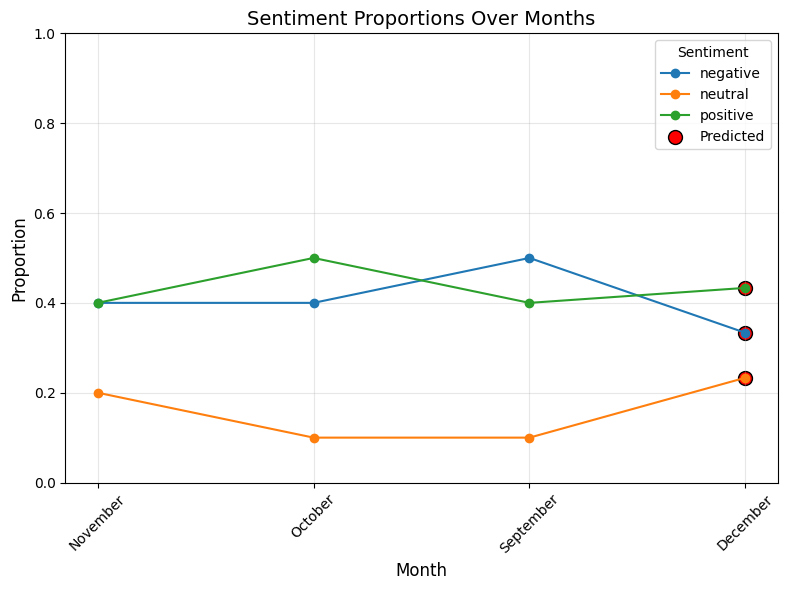

In [ ]:
# Plot the sentiment proportions
plt.figure(figsize=(8, 6))

# Plot lines for each sentiment
for sentiment in ['negative', 'neutral', 'positive']:
    plt.plot(final_df['date'], final_df[sentiment], label=sentiment, marker='o')

# Highlight December data
lastday_row = final_df[final_df['date'] == '26-11-2024']
for sentiment in ['negative', 'neutral', 'positive']:
    plt.scatter(
        lastday_row['26-11-2024'], 
        lastday_row[sentiment], 
        color='red', 
        label=f"Predicted" if sentiment == 'negative' else None,  # Avoid duplicate legend entries
        s=100, 
        edgecolor='black'
    )

# Customize the plot
plt.title('Sentiment Proportions Over Dates', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.ylim(0, 1)  # Sentiment proportions range from 0 to 1
plt.xticks(rotation=45)
plt.legend(title='Sentiment', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()
